# Reinforcement Learning
强化学习的整体思想有点类似控制理论，即通过让agent与enviroment进行交互，使得return最大化。
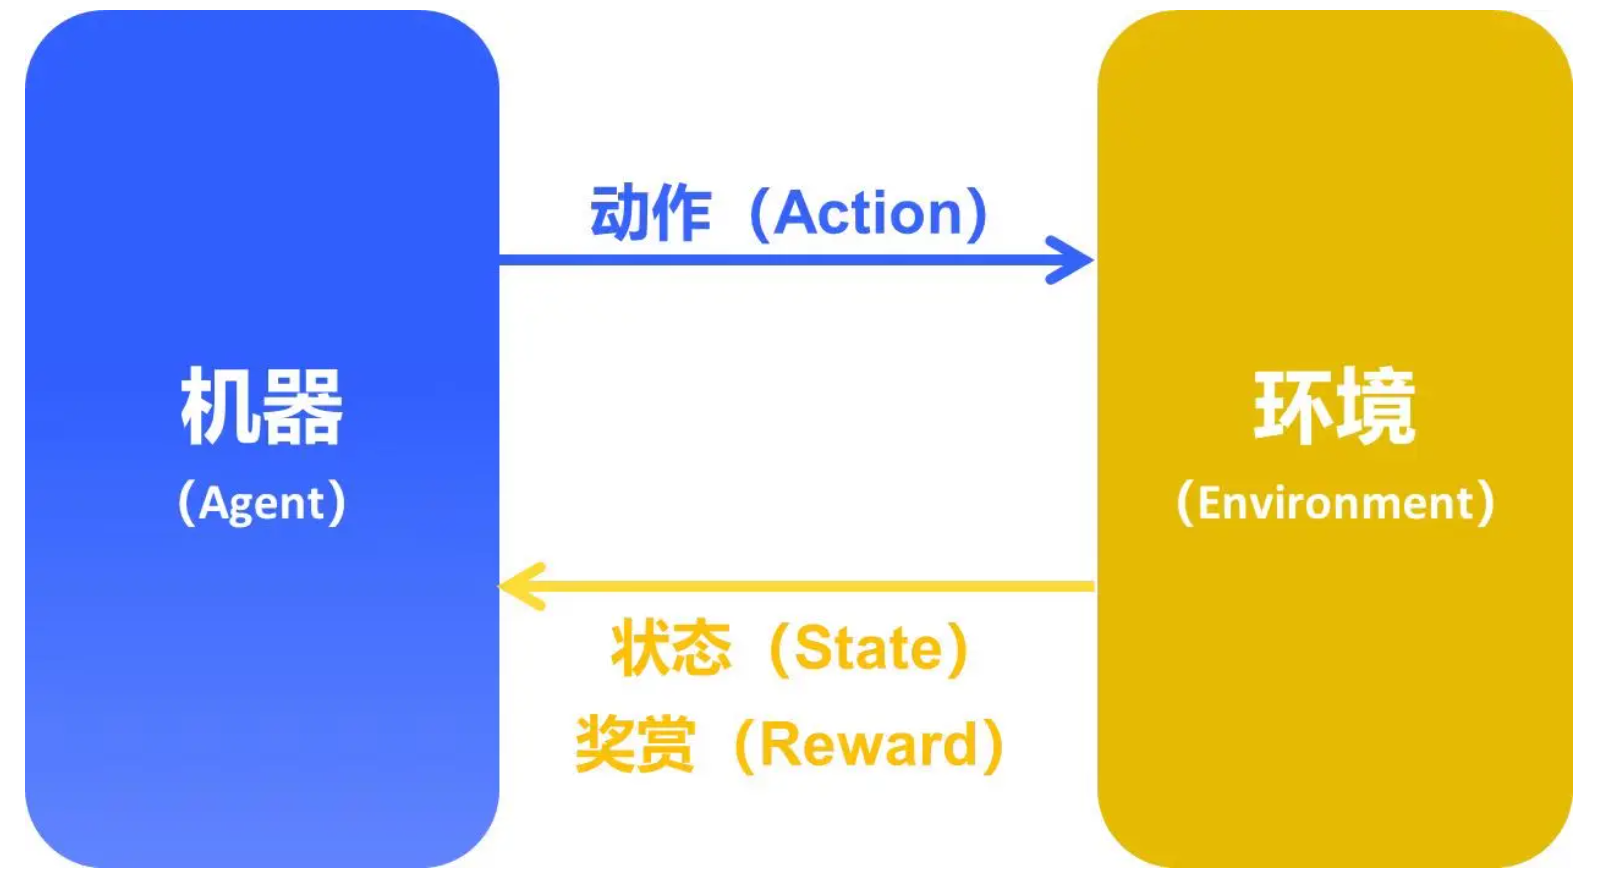    
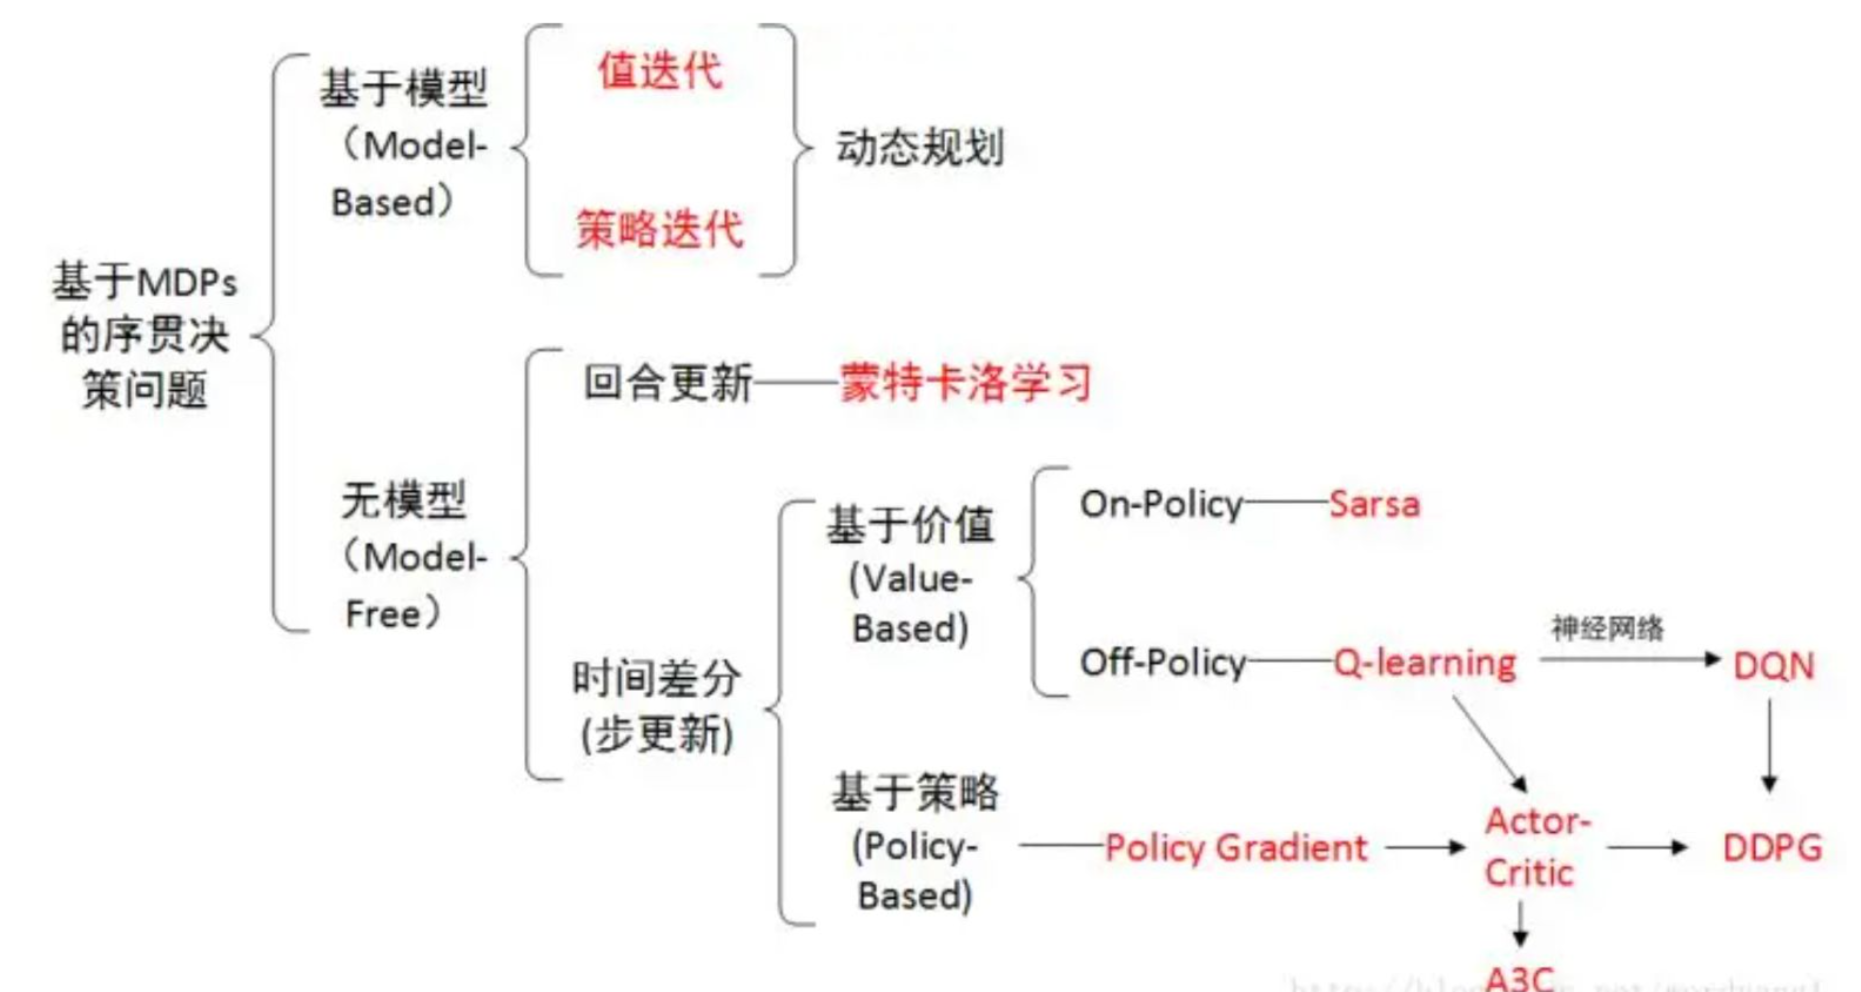

## 1.Basic Concepts
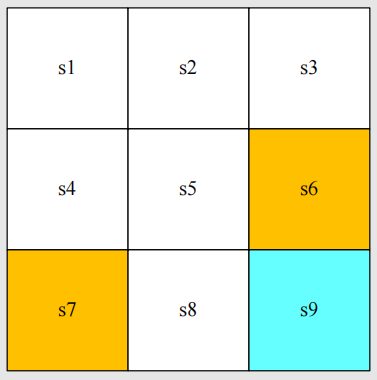    
`State`：agent在环境中说表现出来的状态，即$S_1,S_2,...,S_9$。其可能是个向量，包含多个信息，如位置、速度、加速度等。所有的State组成的集合称为`State Space`,即$S=\{S_1,S_2,...,S_9\}$。    

`Action`：agent在State下可以采取的动作，如上图每个State可以采取的动作有向左、向右、向上、向下、静止这5个Action。所有的Action组成的集合称为`Action Space`，即$A(S_i)=\{A_1,A_2,...,A_5\}$。由于Action与State密切相关，所以$A$表现为$S_i$的函数。  

`State Transition`：agent采取$a$从$s$到$s'$的过程。表现为概率形式称为`State Transition posibility`,即$P(s'|s,a)$。   
 
`Policy`：告诉agent在State要采取什么Action，记为$\pi(a|s)$。    

`Reward`：agent没执行一个Action所获得的奖励，其可以是一个确定值，也可以是一个随机值，且与State和Action有关，与下一步的State无关。

`Trajectory`: 其代表着State-Action-Reward序列，可以是有限长也可以是无限长。而当agent按照某个特定的Policy执行时，其可能会到达terminal state而结束，这样一条Trajectory称为`Episode`。

`Return`: 把Trajectiry的Reward累加起来。事实上**Return是用来刻画Policy的好坏的指标**。当Trajectory是无限长时，会导致Return无法收敛，因此引入Discount rate $\gamma$,此时Return定义为$\sum_{t=0}^{\infty}\gamma^tr_t$。进一步分析，当$\gamma$足够小时，随着t增大，$\gamma^t$衰减的越快，故Return主要由近端的Reward决定，进而导致Policy相对**近视**,反之，当$\gamma$足够大时，导致Policy相对**远视**。

基于以上概念，我们引入`Markov Decision Process(MDP)`：
- Markov: 表现为**无历史性**，即当前状态只依赖于当前状态，不依赖于之前的状态。
$
\begin{array}{l}
p\left(s_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(s_{t+1} \mid a_{t+1}, s_{t}\right), \\
p\left(r_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(r_{t+1} \mid a_{t+1}, s_{t}\right).
\end{array}
$   
- Decision:可表现为Policy，agent在State下采取Action的概率。
- Process:由State $S$、Action $A(s)$、Reward $R(s,a)$、State Transition posibility $P(s'|s,a)$、Reward posibility $P(r|s,a)$组成。


## 2.Bellman Equation 
我们定义`State Value (Function)`为：
$$
v_{\pi}(s) = \mathbb{E}\left[G_{t} \mid S_{t} = s\right]
$$
其中$G_t$为agent沿着一条Trajectory的Return。我们对从$s$出发所有的$G_t$求平均（期望），即得到`State Value`。其与初始状态$s$和策略$\pi$有关。事实上，当只存在一条trajectory时，State Value等于Return。   
为了描述不同State之间State Value的关系，对于**每一个State**,我们引入贝尔曼公式：   
$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}\left[R_{t+1} \mid S_{t}=s\right] + \gamma \mathbb{E}\left[G_{t+1} \mid S_{t}=s\right], \\
&= \underbrace{\sum_{a} \pi(a \mid s) \sum_{r} p(r \mid s, a) r}_{\text{mean of immediate rewards}} + \underbrace{\gamma \sum_{a} \pi(a \mid s) \sum_{s'} p(s' \mid s, a) v_{\pi}(s')}_{\text{mean of future rewards}}, \\
&= \sum_{a} \pi(a \mid s) \left[ \sum_{r} p(r \mid s, a) r + \gamma \sum_{s'} p(s' \mid s, a) v_{\pi}(s') \right], \quad \forall s \in \mathcal{S}.
\end{aligned}
$$
其中$\pi(a \mid s)$为Policy，而$p(r \mid s, a)$为Reward posibility，$p(s' \mid s, a)$为State Transition posibility，这两个概率叫做`model`，根据model是否已知，我们把RL分为`model-free`和`model-based`两种。    
我们令：   
$$
\begin{aligned}
r_{\pi}(s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) \sum_{r \in \mathcal{R}} p(r \mid s, a) r, \\
p_{\pi}(s' \mid s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) p(s' \mid s, a).
\end{aligned}
$$   
事实上，前者为**immediate reward**，后者为**state transition probability**。重写贝尔曼公式：  
$$
v_{\pi}(s) = r_{\pi}(s) + \gamma \sum_{s' \in \mathcal{S}} p_{\pi}(s' \mid s) v_{\pi}(s')
$$ 
对于每一个State都满足贝尔曼公式，即我们会得到$|S|$个公式。我们可以把这些公式写成矩阵形式：   
$$
v_{\pi} = r_{\pi} + \gamma P_{\pi} v_{\pi}
$$
其中$v_{\pi}$和$r_{\pi}$为列向量，$P_{\pi}$是由State Transition posibility组成的方阵，$[P_{\pi}]_{ij}$为$p_{\pi}(s'=s_j \mid s=s_i)$。展开表现为：
$$
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}} = 
\underbrace{\left[\begin{array}{l}
r_{\pi}\left(s_{1}\right) \\ 
r_{\pi}\left(s_{2}\right) \\ 
r_{\pi}\left(s_{3}\right) \\ 
r_{\pi}\left(s_{4}\right)
\end{array}\right]}_{r_{\pi}} + 
\gamma \underbrace{\left[\begin{array}{llll}
p_{\pi}\left(s_{1} \mid s_{1}\right) & p_{\pi}\left(s_{2} \mid s_{1}\right) & p_{\pi}\left(s_{3} \mid s_{1}\right) & p_{\pi}\left(s_{4} \mid s_{1}\right) \\
p_{\pi}\left(s_{1} \mid s_{2}\right) & p_{\pi}\left(s_{2} \mid s_{2}\right) & p_{\pi}\left(s_{3} \mid s_{2}\right) & p_{\pi}\left(s_{4} \mid s_{2}\right) \\
p_{\pi}\left(s_{1} \mid s_{3}\right) & p_{\pi}\left(s_{2} \mid s_{3}\right) & p_{\pi}\left(s_{3} \mid s_{3}\right) & p_{\pi}\left(s_{4} \mid s_{3}\right) \\
p_{\pi}\left(s_{1} \mid s_{4}\right) & p_{\pi}\left(s_{2} \mid s_{4}\right) & p_{\pi}\left(s_{3} \mid s_{4}\right) & p_{\pi}\left(s_{4} \mid s_{4}\right)
\end{array}\right]}_{P_{\pi}} 
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}}
$$

对贝尔曼公式的求解实际上是解得State Value，进而我们可以评估当前的Policy。以下提出两种方法来求解：
- 矩阵方程求解(简单直白)：
$$
v_{\pi} = \left(I - \gamma P_{\pi}\right)^{-1} r_{\pi}
$$
可以证明$(I - \gamma P_{\pi})^{-1}$始终存在。但是当维度过高时，求逆的计算量太大。
- 迭代法求解(效率高)：
$$
v_{k+1} = r_{\pi} + \gamma P_{\pi} v_{k}, \quad k = 0, 1, 2, \ldots
$$
可以证明(压缩映射理论)，当迭代次数足够大，即$k \rightarrow \infty$时，$v_{\pi}$收敛到$(I - \gamma P_{\pi})^{-1}$。

State Value是agent从某个State出发所得到的平均期望，为了得到具体采取某个action对应的期望，我们定义`Action Value (Function)`：
$$
q_{\pi}(s, a) \doteq \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]
$$
对比State Value和Action Value的定义：
$$
\underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s\right]}_{v_{\pi}(s)} = \sum_{a \in \mathcal{A}} \underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]}_{q_{\pi}(s,a)} \pi(a \mid s)
$$
上式可以表明，Stade Value等于在Policy下所有Action Value的加权和，对照贝尔曼公式，我们可以得到：
$$
q_{\pi}(s, a) = \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v_{\pi}(s')
$$


## 3.Bellman Optimality Equation
RL的核心目的是找到最优Policy，我们定义**如果某个Policy下对应的State Value大于其它任何Policy下对应的State Value，则该Policy为最优Policy**。而贝尔曼最优公式给出了如何求解最优Policy。
$$
\begin{aligned}
v(s) &= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) \left( \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v(s') \right) \\
&= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)
\end{aligned}
$$
写成矩阵形式： 
$$
v = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v \right)
$$
这个公式乍一看不好理解，因为似乎我们要通过一个式子求解两个未知数$v$和$\pi$。我们可以通过以下几步来求解：     
1、给等式右边的v(s`)赋一个初值    
2、求解最优化问题$\ \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)$,可证明其解为：
$$
\pi(a \mid s) = \begin{cases} 
1, & a = a^{*} \\ 
0, & a \neq a^{*}
\end{cases}
$$     
其中$a^{*}$对应$q(s, a^{*})$最大的Action。    
3、利用压缩映射原理，迭代求解得到$v^*$，直到收敛：
$$
v_{k+1} = f(v_{k}) = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v_{k} \right), \quad k = 0, 1, 2, \ldots
$$

## 4.Model-Based RL
`Value iteration algorithm`:基于贝尔曼最优公式，我们将算法分为Policy update和Value update两个步骤,具体如下：
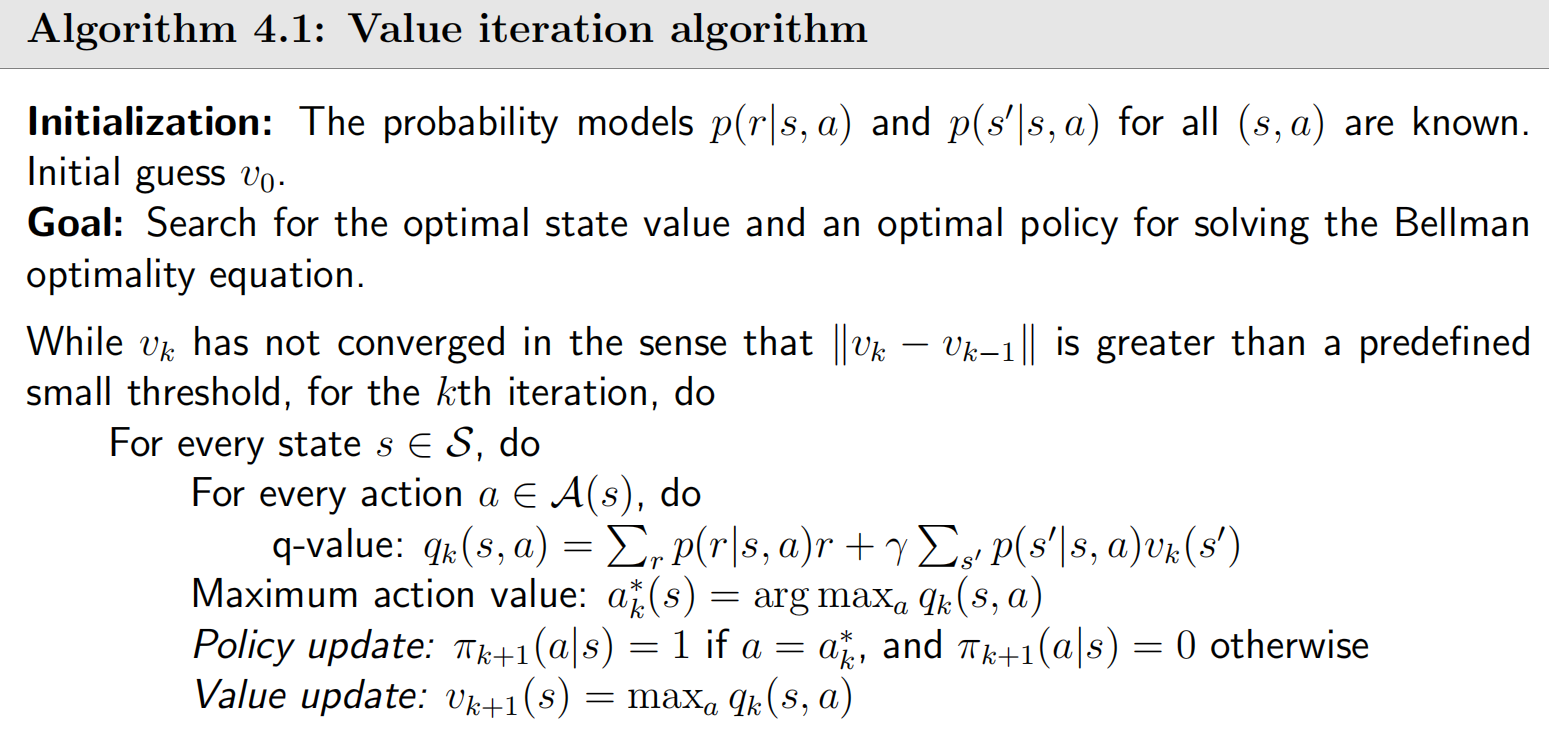     
`Policy iteration algorithm`:Value iteration algorithm是直接从一个初始的State Value开始的，而Policy iteration algorithm则是从一个初始的Policy开始的，通过迭代**无穷多次**求解贝尔曼公式先求出一个State Value，这一步可以理解为一个**策略评估**，然后在优化Policy，具体如下：
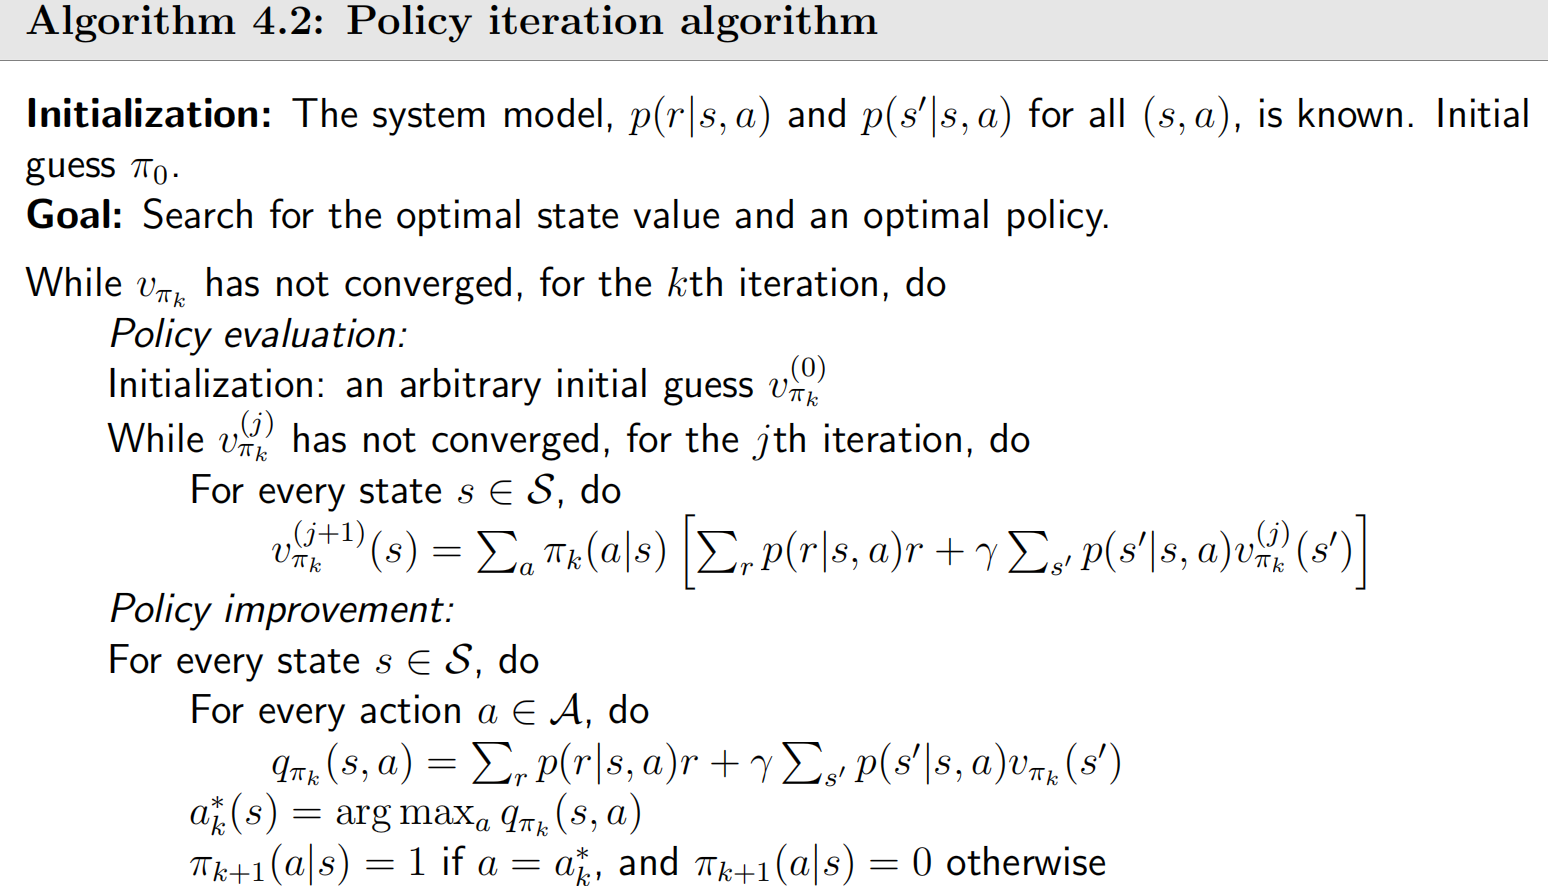    
而当我们求解贝尔曼公式的迭代次数是有限次时，则为`truncated policy iteration algorithm`     
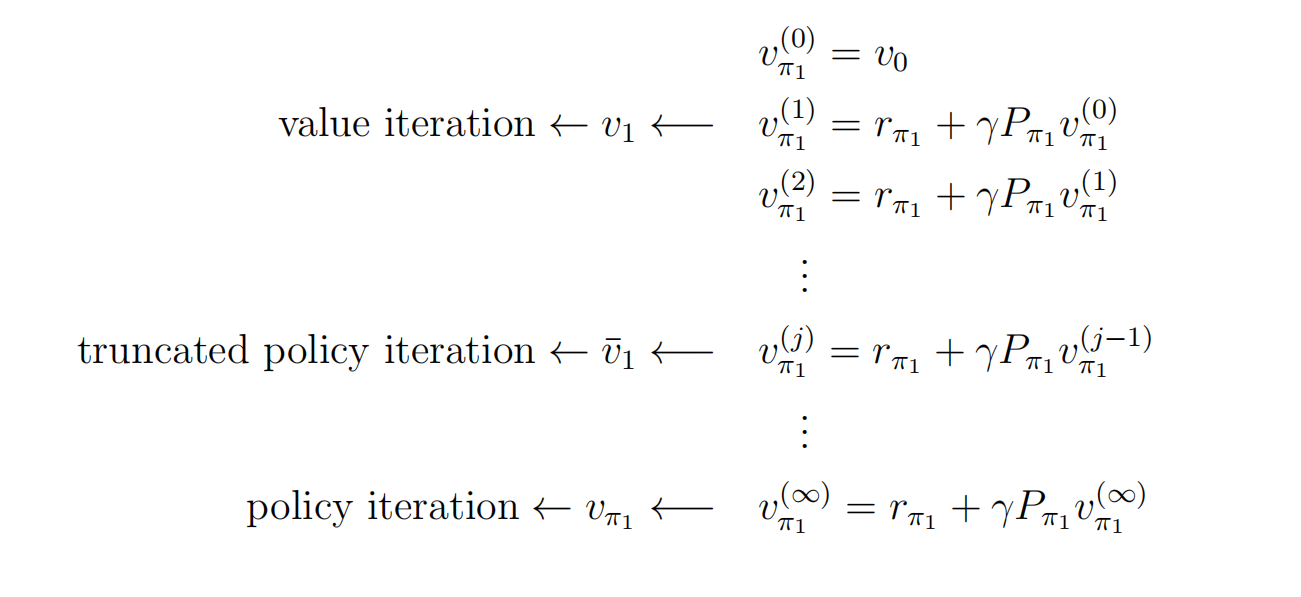



## 5.Monte Carlo Methods
当我们不知道环境的状态转移矩阵，即$P(r|s,a)$和$P(s`|s,a)$时，我们可以基于**数据**来评估期望(大数定律)，这样一种方法统称为蒙特卡洛方法。    
从Model-Based到Model-Free的一个基本想法是将Policy Iteration中的Model-Based部分替换掉，我们先回想一下Policy Iteration的过程：   
1. Policy Evaluation：通过初始策略并结合贝尔曼方程从而解出State Value
2. Policy Improvement：通过找到最大的action value来更新策略
   
其中关键在于得到action value,而在没有模型的情况下，我们可以回归action value的定义：  
$$
\begin{aligned}
q_{\pi_{k}}(s, a) &= \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right] \\
&= \mathbb{E}\left[R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + \cdots \mid S_{t}=s, A_{t}=a\right]
\end{aligned}
$$
结合蒙特卡洛方法，我们有：
- 从s出发，依据Policy $\pi_{k}$生成episode
- 计算return，记作g(s,a)，即为一次采样
- 重复上面多次采样，求平均

$$
q_{\pi_{k}}(s, a) = \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right] \approx \frac{1}{N}\sum_{i=1}^{N} g^{(i)}(s,a).
$$
这样我们就直接得到了action value(Policy Iteration中是通过state value来计算action value的)，**注意**：每一个state都有|A|个action value,Policy影响的是之后的action的选择，当前state下的policy不影响action value的计算。以下给出MC Basic的完整算法：   
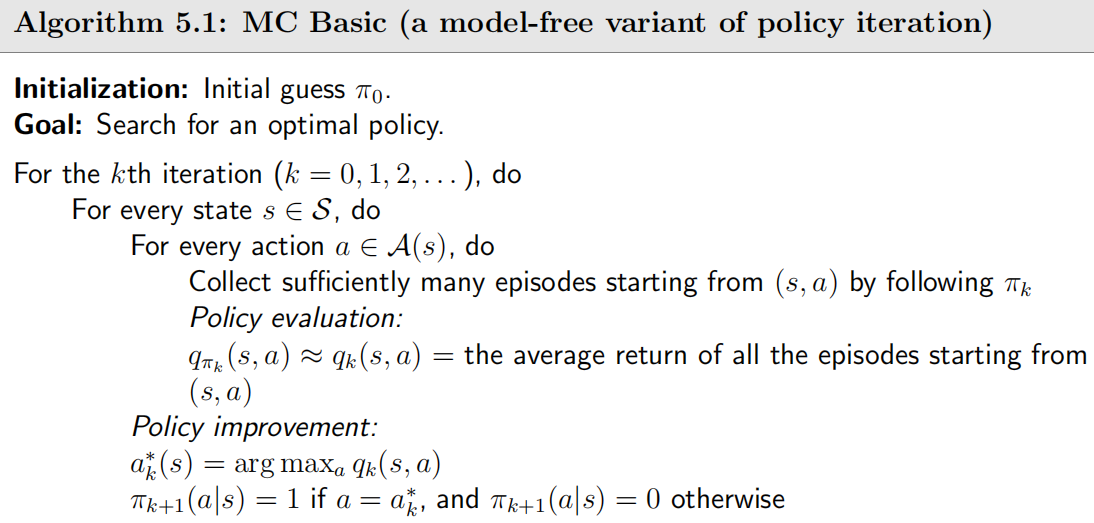       
这里需要关注episode的长度，为了保证其是有限长，我们需要进行合理的设置，当episode太短时，只有靠近目标的state才有非0的state value，只有当足够长时，离目标点远的state才能慢慢达到最优。     
上面这种方法虽然简单直接，但是效率低下。假设我们得到episode:
$$
S_{1} \xrightarrow{a_{2}} S_{2} \xrightarrow{a_{4}} S_{1} \xrightarrow{a_{2}} S_{2} \xrightarrow{a_{3}} S_{5} \xrightarrow{a_{1}} \cdots
$$   
不难发现，这样一条episode不仅可以评估$q_{\pi}(s_1,a_2)$，还可以评估$q_{\pi}(s_2,a_4)$，$q_{\pi}(s_1,a_2)$，$q_{\pi}(s_2,a_3)$等等，这样就能充分利用episode中的信息。    
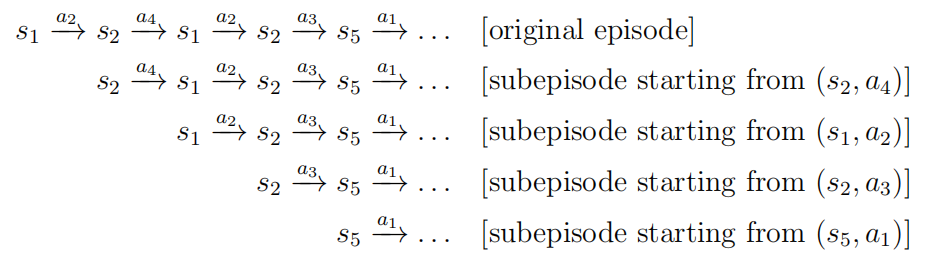    
当某一个(s,a)在episode中出现多次时，如果我们只对第一次出现的(s,a)更新，这种方法叫做`first visit method`，相反，如果对于每一个(s,a)都更新，这种方法叫做`every visit method`。     
在进行策略迭代时，如果我们要等所有的episode都访问完，再求平均得到action value，效率会太慢，而如果我们结合随机梯度下降的思想，每访问一个episode后我们就更新策略，效率将提升。以下是`MC Exploring Starts`完整流程： 
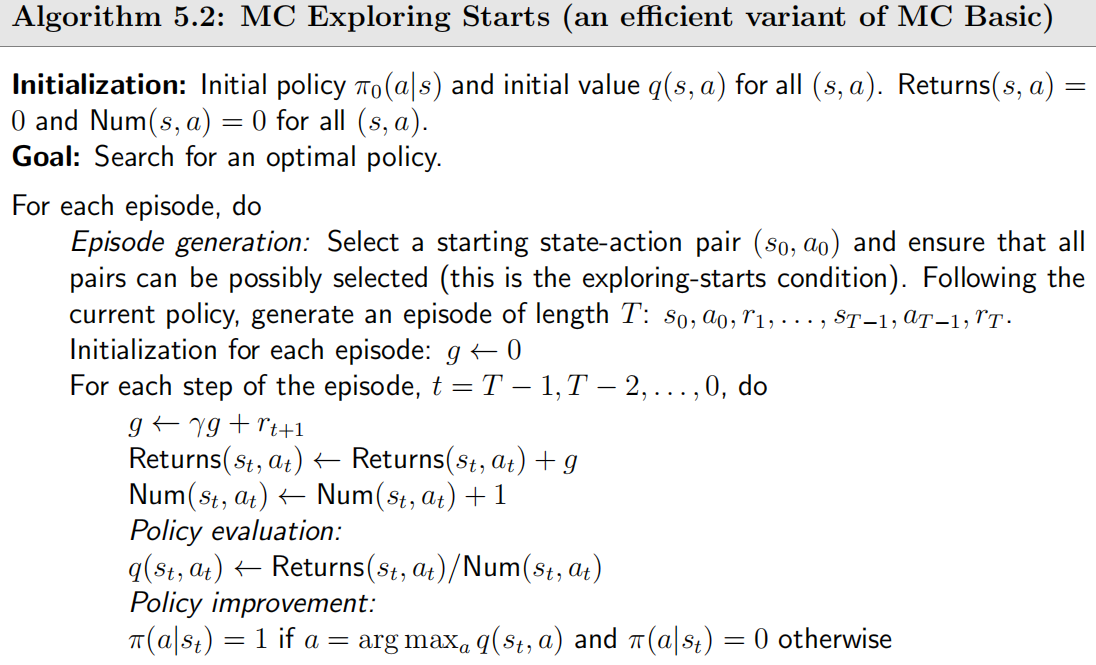    
注意**t是从后面开始的**，这是为了防止重复计算episode靠后面的reward。   
事实上，到这里我们得到两个重要的概念:    
- `exploring`:我们要尽量通过episode来explore所有的(s,a)，这样才能评估所有的action value，以找到最优策略。
- `start`:我们可以基于每一个(s,a)出发来生成episode(实际应用中很难实现)，也可以通过别的(s,a)出发来生成episode，而这个episode是否会经过当前(s,a)不能确保。     

为了解决exploring start的问题，我们引入**soft Policy**，这种思想有点类似于模拟退火，我们在采取最大action value对应的action时，同时也给予一定概率采取其它action。因此在访问一个比较长的episode时，我们可以得到所有的(s,a)，这样可以大大减少episode的数量。    
引入`ε-greedy policy`:
$$
\pi(a \mid s) = \left\{
\begin{array}{ll}
1 - \frac{\epsilon}{|\mathcal{A}(s)|}(|\mathcal{A}(s)| - 1), & \text{for the greedy action,} \\
\frac{\epsilon}{|\mathcal{A}(s)|}, & \text{for the other } |\mathcal{A}(s)| - 1 \text{ actions,}
\end{array}
\right.
$$
其中ε介于0到1之间，可以理解为**探索度**，当其足够小时(例如ε=0，则为greedy policy)，探索度小，保证了最优性；当其足够大时(例如ε=1，则为均匀分布选取action)，探索度大，丢失了最优性。因此**ε不能太大**,或者在最开始的时候 ε 比较大，探索性比较强，最后 ε 逐渐减小到 0，就可以得到一个最优的策略。     
我们把`ε-greedy policy`和`MC Exploring Starts`结合起来，得到`ε-greedy MC`，算法如下：    
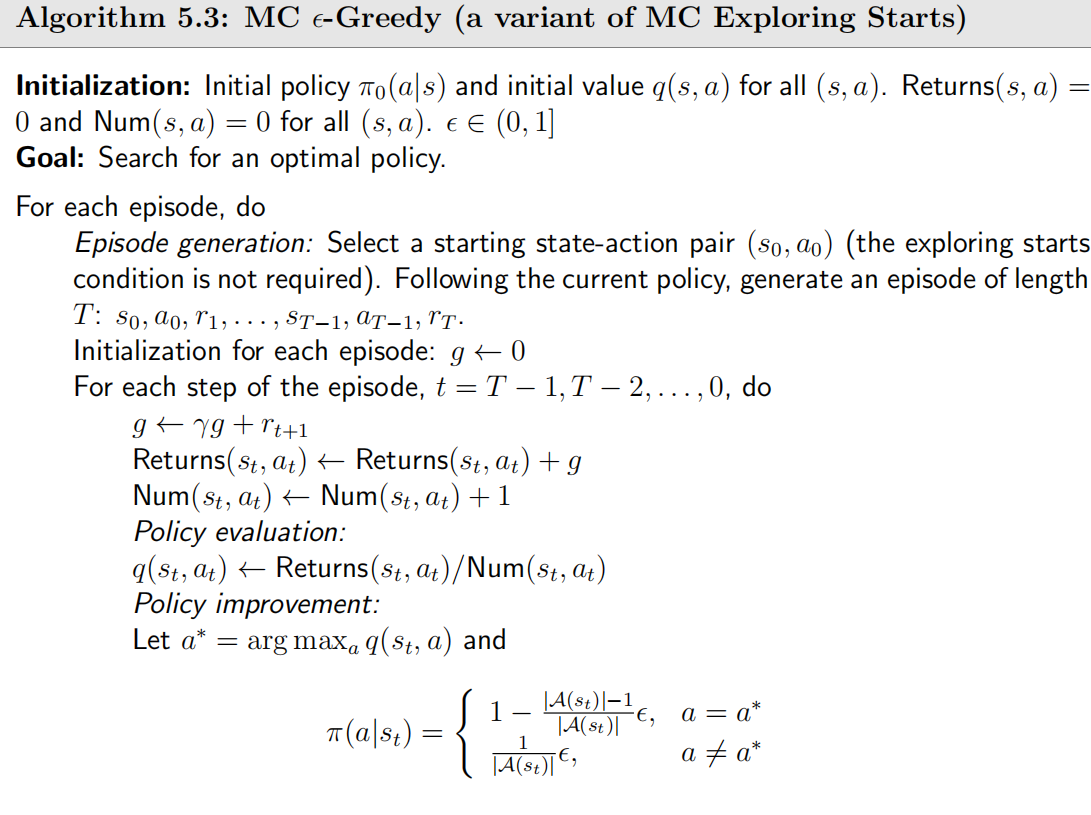    


## 6.TD Learning
TD Learning是一种基于数据的RL，其先通过Policy $\pi$来产生一个如下的experience，并**迭代**来估计State Value。   
$$
\left(s_{0}, a_{0}, r_{1}, s_{1}, a_{1}, \ldots, s_{t}, a_{t}, r_{t+1}, s_{t+1}, a_{t+1}, \ldots\right)
$$
下面给出TD Learning的表达形式：   
$$
\underbrace{v_{t+1}\left(s_{t}\right)}_{\text{new estimation}} = \underbrace{v_{t}\left(s_{t}\right)}_{\text{current estimation}} - \alpha\left(s_{t}\right) \underbrace{\Big[v_{t}\left(s_{t}\right) - \underbrace{\big[r_{t+1} + \gamma v_{t}\left(s_{t+1}\right)\big]}_{\text{TD target } \hat{v}_{t}}\Big]}_{\text{TD error } \delta_{t}}
$$   
其中$s_{t}$表示第t时刻的state，，TD Learning的迭代过程可以参考**学习向量量化**,实际上是一个$V \rightarrow TD target$的过程，我们可以证明当$V_t(s_t) \rightarrow V_{t,\pi}(s_t)$时，TD error $\delta_t$趋于0。注意：**每一个时刻t只更新当前的state的$V(s_t)$,而其它state的state value不变$**。TD Learning另一个表达形式为：  
$$
V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]
$$
TD Learing的本质是在求解
$$
v_{\pi}(s) = \mathbb{E}\left[R + \gamma v_{\pi}(S') \mid S = s\right], \quad s \in \mathcal{S}
$$   
为了评估Action Value,我们在以上基础上进行改进，将$v(s)$改为$q(s,a)$，即得到`Sarsa`算法：   
$$
\begin{aligned}
q_{t+1}(s_t, a_t) &= q_t(s_t, a_t) - \alpha_t(s_t, a_t)\Big[q_t(s_t, a_t) - \big(r_{t+1} + \gamma q_t(s_{t+1}, a_{t+1})\big)\Big], \\
q_{t+1}(s, a) &= q_t(s, a), \quad \text{for all } (s, a) \neq (s_t, a_t).
\end{aligned}
$$
此时基于的experience为：   
$$
\left\{\left(s_{t}, a_{t}, r_{t+1}, s_{t+1}, a_{t+1}\right)\right\}_{t}
$$    
同上，Sarsa实际上在求解：  
$$
q_{\pi}(s, a) = \mathbb{E}\left[R + \gamma q_{\pi}(S', A') \mid s, a\right], \quad \forall s, a.
$$
通过这一步我们用$q_{t+1}(s_t,a_t)$来评估$q_{\pi}(s_t,a_t)$，结合Policy improvement形成完整的Sarsa算法：
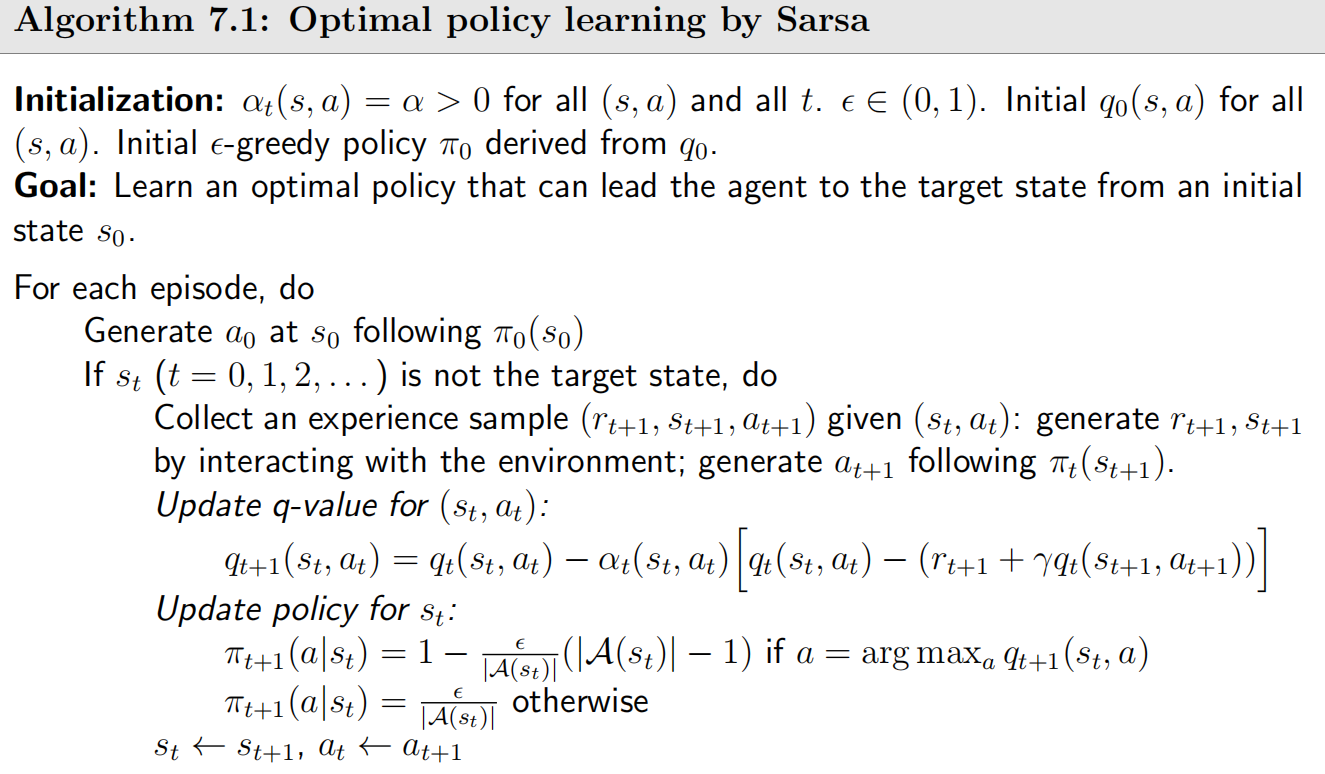    
至此，我们可以对比MC算法：    
| TD / Sarsa | MC |
|------------|----|
| **Online**：可以使用每步的experience，立即更新状态/动作值 | **Offline**：需要等待每个episode数据采集完毕后求平均，再进行更新 |
| **Continuing & Episodic tasks** | 仅**Episodic tasks** |
| **Bootstrapping**：依赖于**初始估计**和历史估计,初始评估不一定准确，随着迭代次数的增加，估计越来越准确 | **Non-bootstrapping**：直接估计，不依赖初始值 |
| **Lower estimation variance**：只依赖少数几个随机变量(s,a,r,s\`,a`)，方差小| **Higher estimation variance**：依赖的随机变量较多，方差大 |     

下面我们对Sarsa进行一些改进：
$$
\begin{aligned}
q_{t+1}(s_t, a_t) &= q_t(s_t, a_t) - \alpha_t(s_t, a_t)\Big[q_t(s_t, a_t) - \big(r_{t+1} + \gamma \mathbb{E}[q_t(s_{t+1}, A)]\big)\Big], \\
q_{t+1}(s, a) &= q_t(s, a), \quad \text{for all } (s, a) \neq (s_t, a_t).
\end{aligned}
$$
对比普通Sarsa，改进后的Sarsa将TD target从"$r_{t+1} + \gamma \max_{a} q_t(s_{t+1}, a)$"改为"$r_{t+1} + \gamma \mathbb{E}[q_t(s_{t+1}, A)]$",因此不需要再对$a_{t+1}$进行采用，简化了experience的数量，但是增加了如下计算：
$$
\mathbb{E}\left[q_{t}\left(s_{t+1}, A\right)\right] = \sum_{a} \pi_{t}\left(a \mid s_{t+1}\right) q_{t}\left(s_{t+1}, a\right) \doteq v_{t}\left(s_{t+1}\right)
$$
故此算法叫做`Expected Sarsa`。其在数学上是在解决：  
$$
q_{\pi}(s, a) = \mathbb{E}\left[R_{t+1} + \gamma v_{\pi}(S_{t+1}) \mid S_t = s, A_t = a\right]
$$
另一个改进策略则是想解决：  
$$
q_{\pi}(s, a) = \mathbb{E}\left[G_{t}^{(n)} \mid s, a\right] = \mathbb{E}\left[R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n} q_{\pi}\left(S_{t+n}, A_{t+n}\right) \mid s, a\right]
$$
这是一种介于Sarsa和MC的算法，事实上，当n=1时，就是Sarsa，当n=$\infty$时，就是MC。我们修改TD target,则可得到`n-step Sarsa`：  
$$
\begin{aligned}
q_{t+1}(s_t, a_t) &= q_t(s_t, a_t) \\
&\quad - \alpha_t(s_t, a_t)\Bigg[q_t(s_t, a_t) - \bigg(r_{t+1} + \gamma r_{t+2} + \cdots + \gamma^{n-1} r_{t+n} + \gamma^n q_t(s_{t+n}, a_{t+n})\bigg)\Bigg]
\end{aligned}
$$



以下引入两个概念：
- Behavior policy：agent在与environment进行交互时，用于产生expirience的策略。
- Target policy：agent在训练过程中，用于更新的策略，最终这个策略将作为最优策略。   

当Behavior policy和Target policy相同时，称为`on-policy`,如MC和Sarsa算法，它们在获取experience时，会依赖一个策略，而通过Policy improvement来优化这个策略，然后再基于这个策略来进行expirience的采样...如此反复。   
当Behavior policy和Target policy不同时，称为`off-policy`，我们用一个Policy来采样得到experience，然后通过Policy improvement来优化另一个Policy，而这个策略最后将作为最优策略。之后介绍的q-learning算法即是一种off-policy算法。   
**当Behavior policy和Target policy分离时，我们可以采取一个exploratory很强的策略来作为Behaviror policy,而不依赖于Target policy**。

`Q-learning`算法不需要进行Policy evaluation和Policy improvement之间的反复交替运行,而是**直接**就将**最优的q值**作为目标。其要解决的数学问题为：   
$$
q(s,a) = \mathbb{E}\left[R_{t+1} + \gamma \max_{a} q(S_{t+1}, a) \mid S_t = s, A_t = a\right], \quad \forall s,a.
$$
这实际上就是**贝尔曼最优公式**。我们修改TD target,得到Q-learning算法：
$$
\begin{aligned}
q_{t+1}(s_t, a_t) &= q_t(s_t, a_t) - \alpha_t(s_t, a_t)\left[q_t(s_t, a_t) - \left(r_{t+1} + \gamma \max_{a \in \mathcal{A}(s_{t+1})} q_t(s_{t+1}, a)\right)\right], \\
q_{t+1}(s, a) &= q_t(s, a), \quad \text{for all } (s, a) \neq (s_t, a_t).
\end{aligned}
$$  
其依赖的experience为：   
$$
\left\{\left(s_{t}, a_{t}, r_{t+1}, s_{t+1}\right)\right\}
$$
注意到这四个变量都**不依赖特定策略**。结合TD，对Q-learning的直观理解：   
$$
新的q值 = 旧的q值 + \alpha * (现实 - 估计)
$$
其中“现实”作为更新的目标，表示最优的action下对应的reward。    
根据on-policy和off-policy的不同，Q-learning算法可以分为两类：
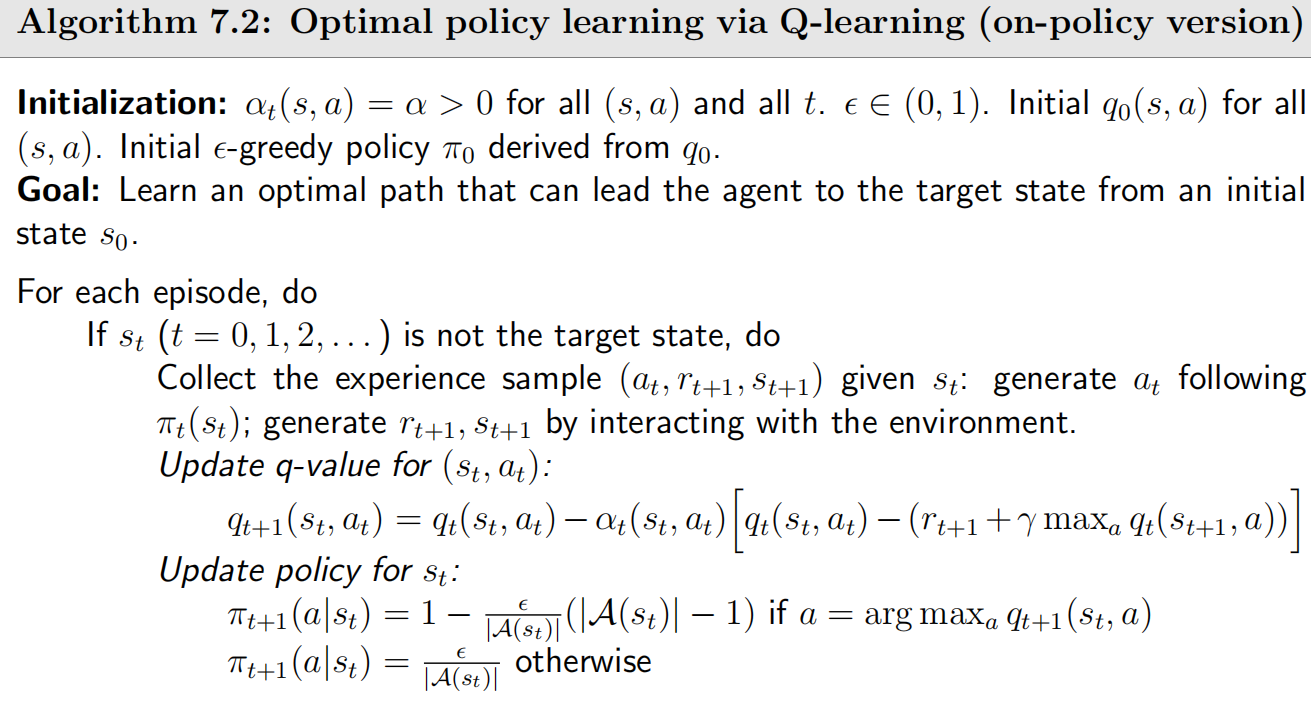
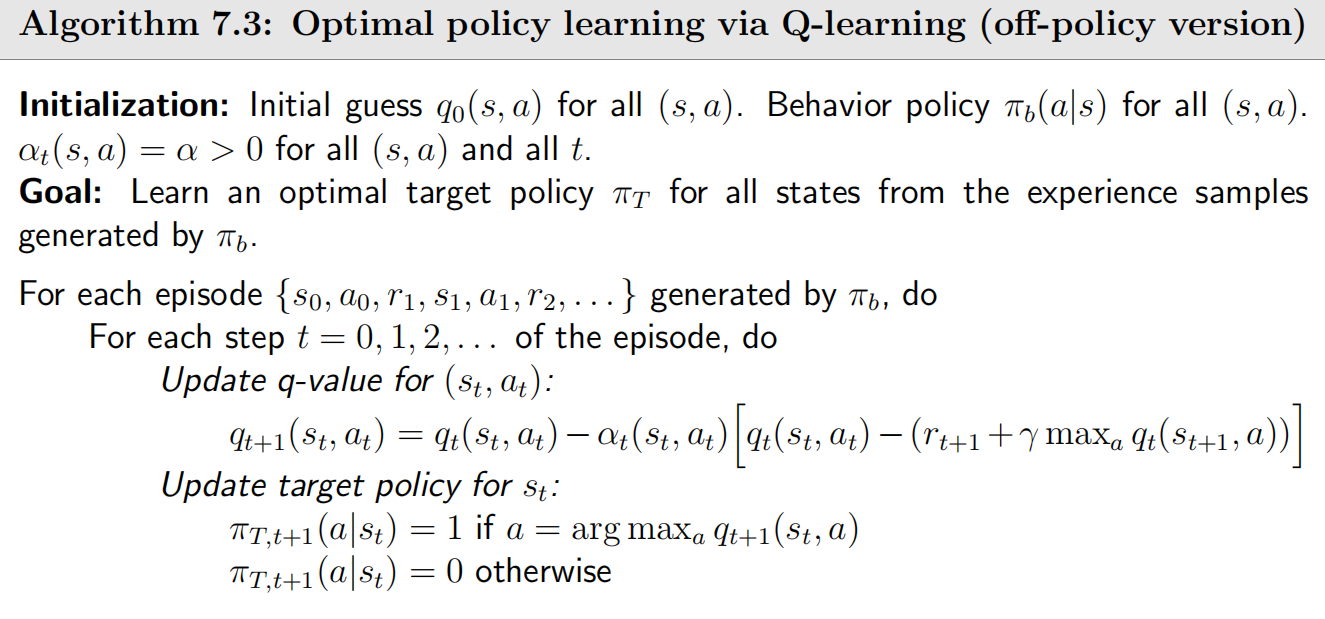

## 7.Value Function Methods
在此之前我们都是基于**表格**来存储State value和Action value的，例如用一个二维数组，横坐标表示action，纵坐标表示state，即可找到任意一个q(s,a)。但是，当state或action数量很大，甚至连续时，基于表格的方法将不再使用，因此我们想通过一个**函数来拟合state和state value之间的关系**，如图：    
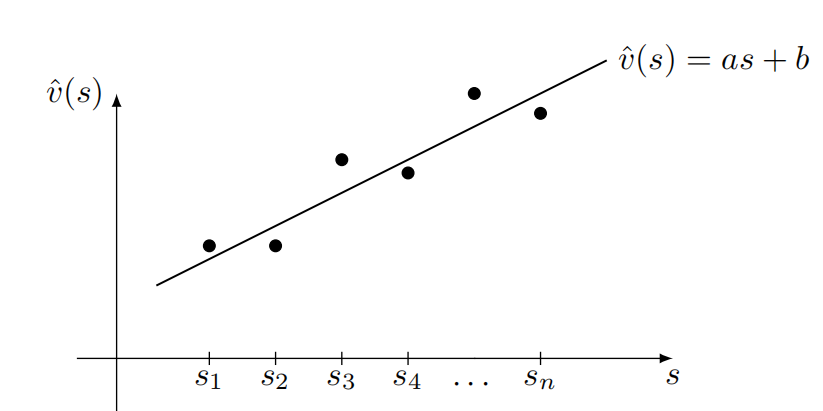    
s和v之间存在线性关系：   
$$
\hat{v}(s, w) = a s + b = \underbrace{[s, 1]}_{\phi^{T}(s)} \underbrace{\begin{bmatrix} a \\ b \end{bmatrix}}_{w} = \phi^{T}(s) w
$$
其中$\phi(s)$叫`feature vector`，$w$叫`parameter vector`，这样我们只需要存储$w$就可以得到任意s对应的v，**节省空间的同时提高了泛化性能**。    
这是一种线性近似，因为对于w来说，$\phi(s)$是一个线性函数，其非线性部分都被放在了feature vector中。而对于非线性拟合，我们可采用`神经网络`。    
接下来的问题是如何得到对应法则$\hat{v}(s, w)$，即如何训练$w$。    
首先我们定义目标函数，结合线性回归的思想：   
$$
J(w) = \mathbb{E}\left[\left(v_{\pi}(S) - \hat{v}(S, w)\right)^{2}\right]
$$
注意到S是随机变量，所以我们需要对其求期望，但S的概率分布未知，一种容易想到的办法是假设S服从均匀分布，即每个S出现的概率都是1/n，于是有：   
$$
J(w) = \frac{1}{n} \sum_{s \in \mathcal{S}} \left(v_{\pi}(s) - \hat{v}(s, w)\right)^{2}
$$
但这种假设显然是过于理想，没有考虑到各种状态的重要性不尽相同，因此我们引入一种更一般化的`stationary distribution`，其描绘了马尔可夫过程的一个长期行为：agent从一个state出发，按照一个策略采取action,不断的与环境进,然后不断的采取这个action，我们会达到一个稳定状态，这个稳定状态会反映出每个state出现的可能性。我们改写目标函数：    
$$
J(w) = \sum_{s \in \mathcal{S}} d_{\pi}(s) \left(v_{\pi}(s) - \hat{v}(s, w)\right)^{2}
$$
其中$d_{\pi}(s)$表示基于策略$\pi$s出现的概率。可以理解为权重，即$d_{\pi}(s)$越大，说明s越重要，我们希望找到一个$w$使得误差越小。其满足**归一性**和**非负性**。以下介绍两种方法得到$d_{\pi}(s)$:
1. 直接通过采用，计算：
$$
d_{\pi}(s) \approx \frac{n_{\pi}(s)}{\sum_{s' \in \mathcal{S}} n_{\pi}(s')}
$$
1. 利用马尔可夫决策过程稳态分布
$$
d_{\pi}^{T} = d_{\pi}^{T} P_{\pi}
$$    
下面我们将求解$w$：     
我们要最小化目标函数$J(w)$，最常用的方法就是梯度下降：  
$$
\begin{aligned}
w_{k+1} &= w_{k} - \alpha_{k} \nabla_{w} J(w_{k}), \\
\text{其中 } \nabla_{w} J(w_{k}) &= \nabla_{w} \mathbb{E}\left[\left(v_{\pi}(S) - \hat{v}(S, w_{k})\right)^{2}\right] \\
&= \mathbb{E}\left[\nabla_{w}\left(v_{\pi}(S) - \hat{v}(S, w_{k})\right)^{2}\right] \\
&= 2\mathbb{E}\left[\left(v_{\pi}(S) - \hat{v}(S, w_{k})\right)\left(-\nabla_{w} \hat{v}(S, w_{k})\right)\right] \\
&= -2\mathbb{E}\left[\left(v_{\pi}(S) - \hat{v}(S, w_{k})\right) \nabla_{w} \hat{v}(S, w_{k})\right]
\end{aligned}
$$
为了避开求解expectation，我们采用随机梯度下降：
$$
w_{t+1} = w_{t} + \alpha_{t} \big(v_{\pi}(s_{t}) - \hat{v}(s_{t}, w_{t})\big) \nabla_{w} \hat{v}(s_{t}, w_{t})
$$
其中$v_{\pi}(s_t)$是真实的state value，同样有两种方法求解：    
1、基于Monte Carlo方法，即用采样的方法估计$v_{\pi}(s_t)$：   
$$
w_{t+1} = w_t + \alpha_t \big(g_t - \hat{v}(s_t, w_t)\big) \nabla_w \hat{v}(s_t, w_t)
$$
其中$g_t$是从$s_t$出发的一条episode的discounted return      
2、基于TD方法，即用TD方法估计$v_{\pi}(s_t)$：   
$$
w_{t+1} = w_t + \alpha_t \left[ r_{t+1} + \gamma \hat{v}(s_{t+1}, w_t) - \hat{v}(s_t, w_t) \right] \nabla_w \hat{v}(s_t, w_t)
$$
其中$r_{t+1} + \gamma \hat{v}(s_{t+1}, w_t)$作为TD target。   
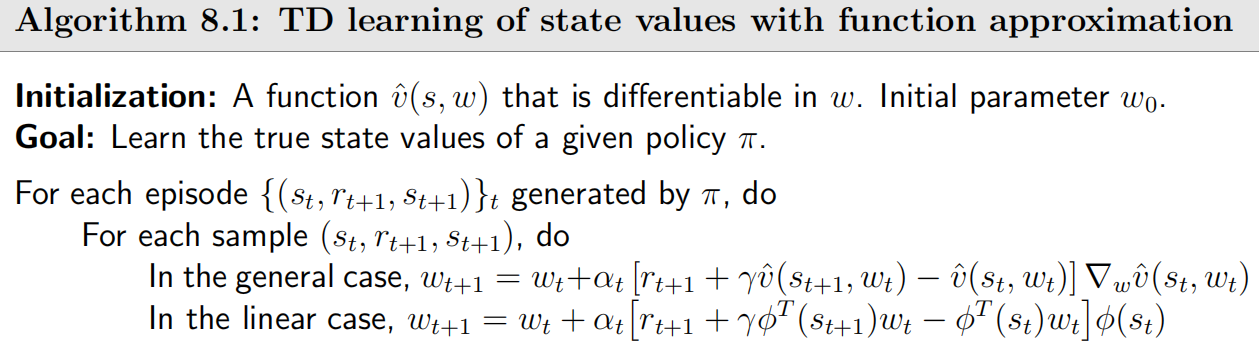     
对于linear case,我们有：
$$
\nabla_{w} \hat{v}(s, w) = \phi(s)
$$
**小结**：我们实际上在做的是Policy evaluation，即用已知的策略$\pi$来估计state value，即用已知的策略来评估state value。

同理，我们可以用一个函数来表示(s,a)和q之间的映射关系，于是，重写Sarsa算法：   
$$
w_{t+1} = w_{t} + \alpha_{t}\Big[r_{t+1} + \gamma \hat{q}(s_{t+1}, a_{t+1}, w_{t}) - \hat{q}(s_{t}, a_{t}, w_{t})\Big]\nabla_{w}\hat{q}(s_{t}, a_{t}, w_{t})
$$
注意我们是对函数$\hat{q}(s,a,w)$中参数w进行更新迭代，实际上核心思想就是**将查表的过程替换成函数**。
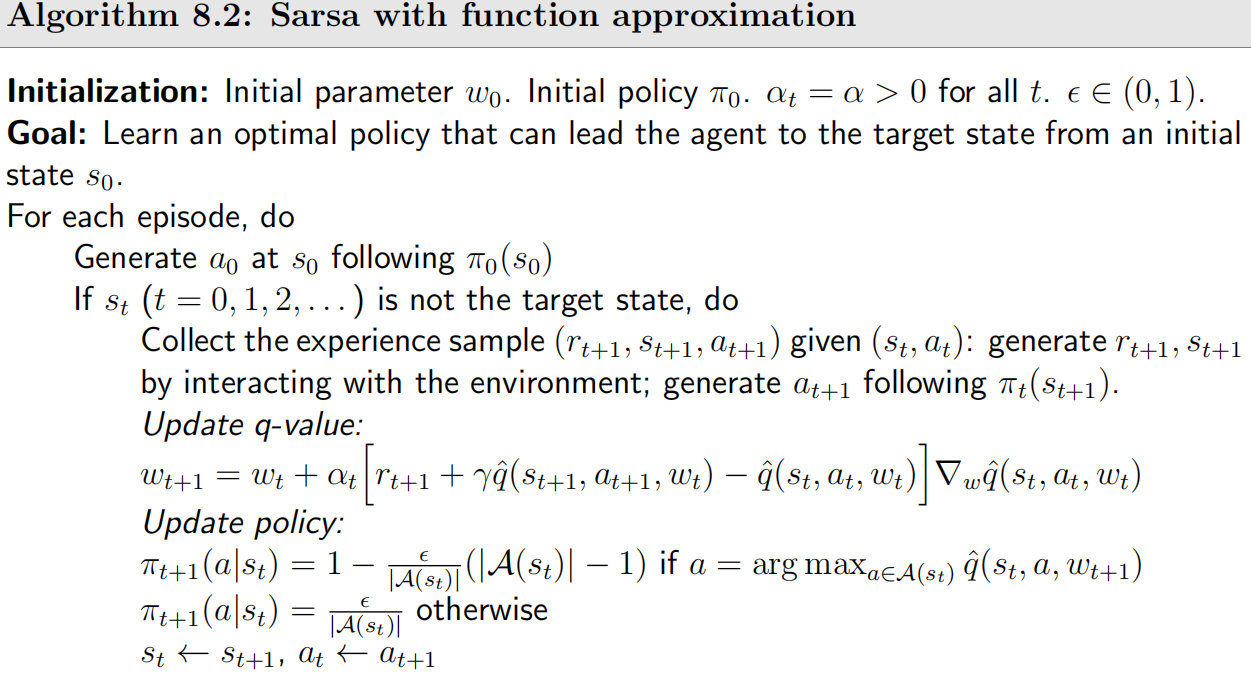    
结合Q-learning算法，理论有：
$$
w_{t+1} = w_{t} + \alpha_{t}\bigg[r_{t+1} + \gamma \max_{a \in \mathcal{A}(s_{t+1})} \hat{q}\big(s_{t+1}, a, w_{t}\big) - \hat{q}\big(s_{t}, a_{t}, w_{t}\big)\bigg] \nabla_{w} \hat{q}\big(s_{t}, a_{t}, w_{t}\big)
$$
如果引入**神经网络**来近似函数$\hat{q}(s,a,w)$，涉及到对底层梯度的计算，效率不高，因此我们单纯的把神经网络看作一个**黑盒**,通过把s和a作为输入，q作为输出，重新定义损失函数：   
$$
J = \mathbb{E}\left[\left(R + \gamma \max_{a \in \mathcal{A}(S')} \hat{q}(S', a, w) - \hat{q}(S, A, w)\right)^2 \right]
$$
显然这就是Q-learning的TD error,如果对w求导，会涉及到同时计算两部分的梯度，而其中$\max_{a \in \mathcal{A}(S')}\hat{q}(S', a, w)$是不便于求导的，因此`Deep Q-learning`采用了**两个网络**$q(s,a,w)$和$q(s,a,w_t)$，前者为**main network**，后者为**target network**，于是重写目标函数：
$$
J = \mathbb{E}\left[\left(R + \gamma \max_{a \in \mathcal{A}(S')} \hat{q}(S', a, w_T) - \hat{q}(S, A, w)\right)^2 \right]
$$
此时J相当于只是w的函数，先对main network求导：
$$
\nabla_w J = -\mathbb{E}\left[\left(R + \gamma \max_{a \in \mathcal{A}(S')} \hat{q}(S', a, w_T) - \hat{q}(S, A, w)\right) \nabla_w \hat{q}(S, A, w)\right]
$$
当main network更新一段时间后把$w$赋值给$w_t$，再通过$w_t$计算target network的输出，更新main network的参数，如此循环。这样有效避开了同时对两个部分的求导。     
当然，由于神经网络训练样本要求独立同分布，而通过强化学习采集到的数据之间存在着关联性，利用这些数据进行顺序训练，神经网络当然不稳定，为了打破这种关联，Deep Q-learning采用**经验回放**，即先将收集到的数据存到重放缓存区$B = {(s,a,r,s`)}$，每次训练时，从B中**随机有放回抽取**一批样本来训练，这样也提高了样本的利用率。    
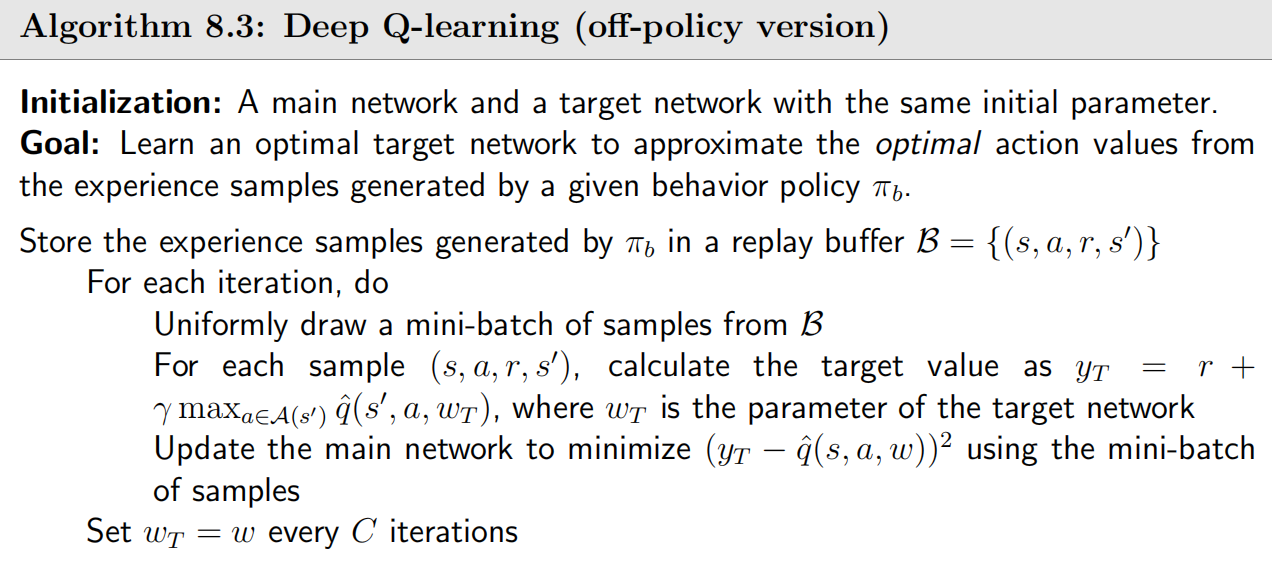


## 8.Policy Gradient Methods
在此之前的方法都是`Value-Based`，即通过获得最大State value来选择Policy，且所有的Policy都存储在一个表$\pi(a|s)$中，如果对于连续问题,我们不可能计算出每个State所有action对应的value,因此就有了`Policy Gradient Methods`。     
在Value Function Methods中，我们对action value进行近似：   
$$
\hat{q}(s, a, w) \approx q_{\pi}(s, a)
$$
同样的思路，我们直接对Policy进行近似表达： 
$$
\pi_{\theta}(s, a) = P(a \mid s, \theta) \approx \pi(a \mid s)
$$
现在我们需要**直接**对策略进行优化，首先确定目标函数：   
- 第一类目标函数是基于**average value**:
$$
\bar{v}_{\pi} = \sum_{s \in \mathcal{S}} d(s) v_{\pi}(s) = \mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^{t} R_{t+1}\right]
$$
其中$d(s)$表示权重，如果只考虑某一特定的初始状态s0，即我们只关注从s0出发的长期回报，则有：
$$
J_{1}(\theta) = V_{\pi_{\theta}}\left(s_{1}\right) = \mathbb{E}_{\pi_{\theta}}\left(G_{1}\right)
$$
更一般地，$d(s)$与Policy有关，即表示我们之前介绍过的Stational Distribution,则有：
$$
J_{avV}(\theta) = \sum_{s} d_{\pi_{\theta}}(s) V_{\pi_{\theta}}(s)
$$   
- 第二类目标函数是基于**average reward**:
$$
J_{avR}(\theta) = \sum_{s} d_{\pi_{\theta}}(s) \sum_{a} \pi_{\theta}(s, a) R_{s}^{a}=\lim_{n \to \infty} \frac{1}{n} \mathbb{E}\left[\sum_{k=1}^{n} R_{t+k}\right]
$$
其中
$$
R_{s}^{a} =\sum_{r} r p(r \mid s, a)
$$
接下来我们用**梯度上升**算法来优化策略参数$\theta$，对上述目标函数求导，均可得到：
$$
\nabla_{\theta} J(\theta) = \mathbb{E}_{\pi_{\theta}}\left[\nabla_{\theta} \log \pi_{\theta}(s, a) q_{\pi}(s, a)\right]
$$
考虑到$\pi_{\theta}(s, a) > 0$,我们可以利用`softmax`来构建$\pi_{\theta}(s, a)$，即：
$$
\pi(a \mid s, \theta) = \frac{e^{h(s, a, \theta)}}{\sum_{a^{\prime} \in \mathcal{A}} e^{h(s, a^{\prime}, \theta)}}
$$   
结合Monte Carlo方法，我们得到更新策略：   
$$
\theta_{t+1} = \theta_{t} + \alpha \nabla_{\theta} \ln \pi(a_{t} \mid s_{t}, \theta_{t}) q_{t}(s_{t}, a_{t})
$$
给出`REINFORCE`完整算法：   
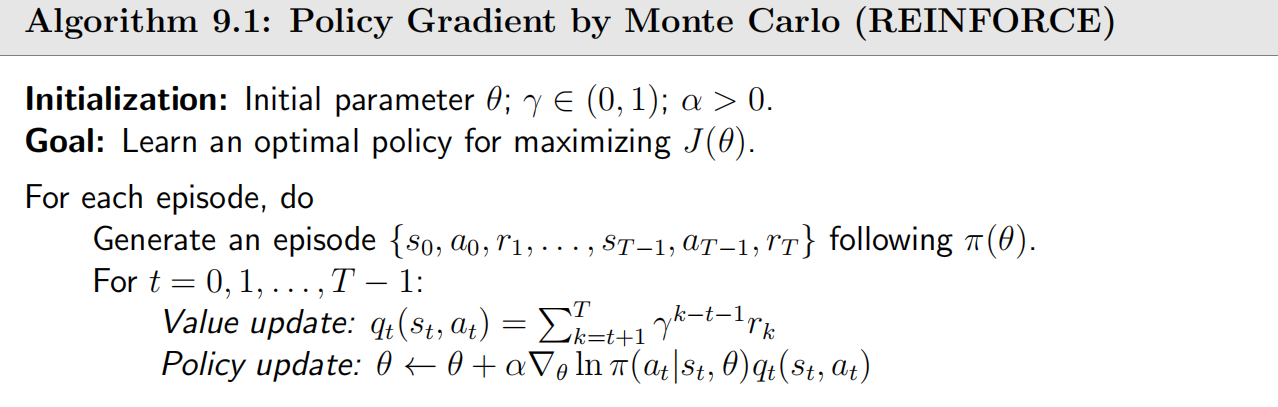




## 9.Actor-Critic Method
前面介绍的REINFORCE方法是利用Monte Carlo来估计q的，我们需要访问完整的序列才能进行更新，且策略函数不太容易收敛。`Actor-Critic`则将Value Based方法与Policy Based方法相结合，通过`Actor`来生成策略，通过`Critic`来估计价值，从而实现更好的收敛。   
我们利用TD来评估q,则有：    
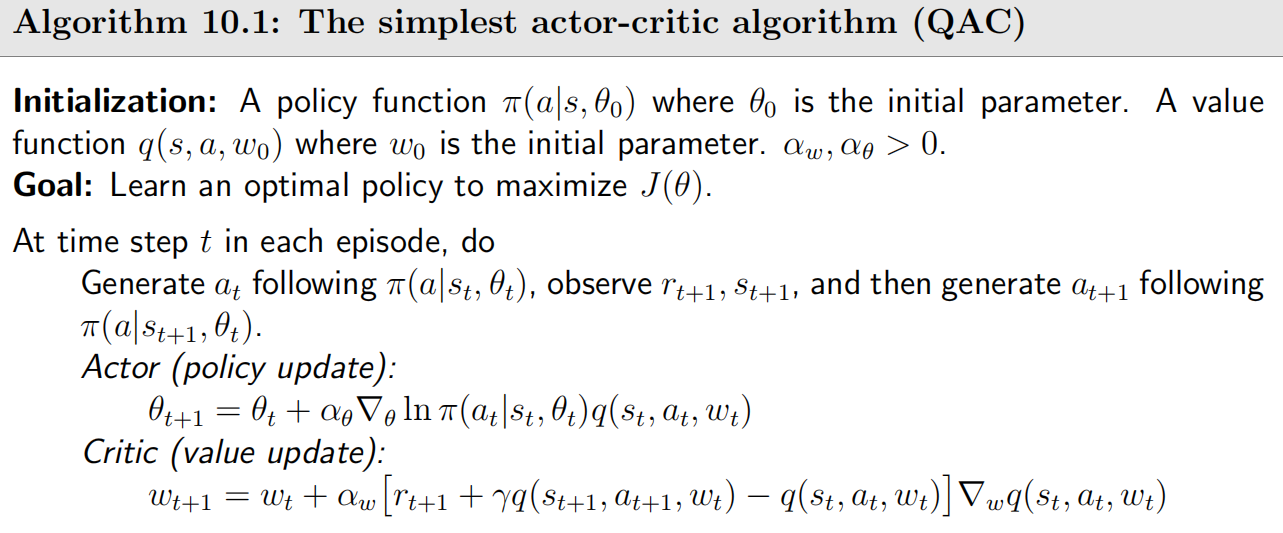
实际上Critic相当于Sarsa with value function approximation.
为了改善收敛性，我们进一步优化，引入`Baseline`以减少估计的**方差**：
$$
\begin{aligned}
\nabla_{\theta} J(\theta) &= \mathbb{E}_{S \sim \eta, A \sim \pi}\left[\nabla_{\theta} \ln \pi\left(A \mid S, \theta_{t}\right) q_{\pi}(S, A)\right] \\
&= \mathbb{E}_{S \sim \eta, A \sim \pi}\left[\nabla_{\theta} \ln \pi\left(A \mid S, \theta_{t}\right) \left(q_{\pi}(S, A) - b(S)\right)\right]
\end{aligned}
$$
这样既没有改变期望值，但对方差产生了影响。当我们选择：  
$$
b(s) = \mathbb{E}_{A \sim \pi}\left[q_{\pi}(s, A)\right] = v_{\pi}(s)
$$
此时方差会大大减小(并不是最优Baseline，为了减小复杂度，选择次优Baseline)，即有：
$$
\begin{aligned}
\theta_{t+1} &= \theta_{t} + \alpha \mathbb{E}\left[\nabla_{\theta} \ln \pi\left(A \mid S, \theta_{t}\right)\left[q_{\pi}(S, A) - v_{\pi}(S)\right]\right] \\
&\doteq \theta_{t} + \alpha \mathbb{E}\left[\nabla_{\theta} \ln \pi\left(A \mid S, \theta_{t}\right) \delta_{\pi}(S, A)\right] .
\end{aligned}
$$
其中$\delta_{\pi}(S, A)$称为**优势函数**,具体而言：  
$q_{\pi}(S,A)$反映的是当前状态S下采取动作A的总期望回报，$v_{\pi}(S)$则是当前状态S的平均期望回报，如果当前action是好的，那么$q_{\pi}(S,A)$会比$v_{\pi}(S)$大，即优势越大，反之越小。    
这里会针对$q_{\pi}(S,A)$和$v_{\pi}(S)$构建两个网络，为了简化，我们将优势函数转化为TD error:
$$
q_{t}\left(s_{t}, a_{t}\right)-v_{t}\left(s_{t}\right)\approx r_{t+1}+\gamma v_{t}\left(s_{t+1}\right)-v_{t}\left(s_{t}\right)
$$  
之所以可以这么做，是因为针对单步采样，TD error是优势函数的**无偏估计**。这样，我们得到`A2C`:
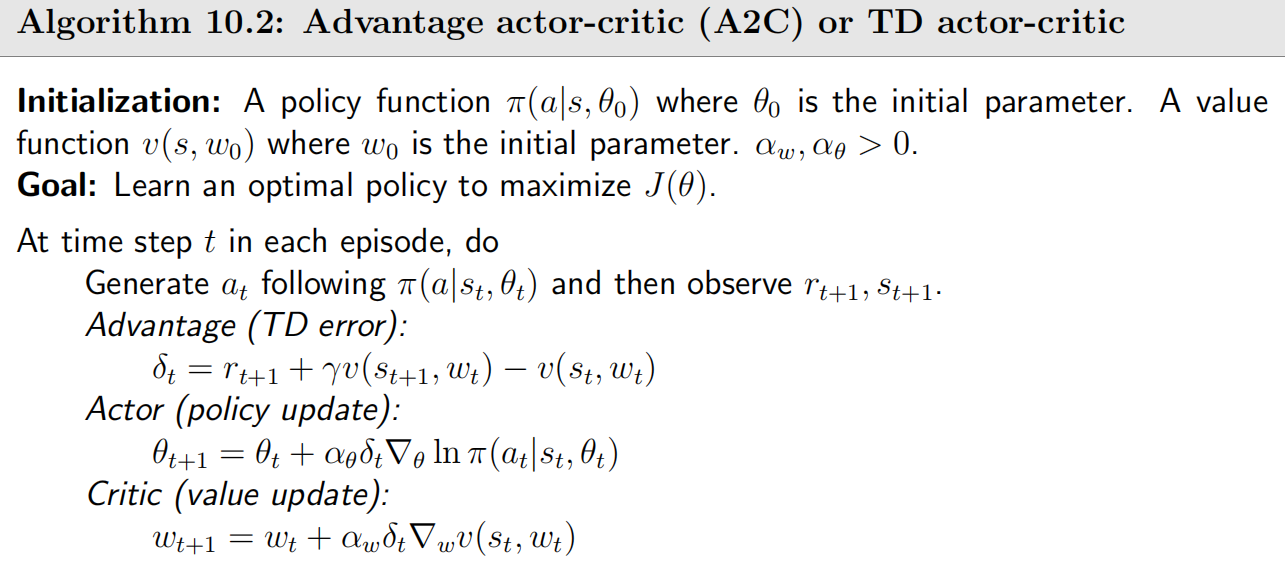 
不难发现A2C是off-policy,因为梯度中$A~\sim~\pi$，如果我们想用概率分布P1生成samples,而求解梯度时我们又希望得到sample在p0上的期望，于是引用`importance sampling`,即：
$$
\mathbb{E}_{X\sim p_{0}}[X]=\sum_{x} p_{0}(x)x=\sum_{x}p_{1}(x)\frac{p_{0}(x)}{p_{1}(x)}x=\mathbb{E}_{X\sim p_{1}}[f(X)]
$$
因此我们改进梯度为：
$$
\nabla_{\theta} J(\theta) = \mathbb{E}_{S \sim \rho, A \sim \beta}\left[\underbrace{\frac{\pi(A \mid S, \theta)}{\beta(A \mid S)}}_{\text{importance weight}} \nabla_{\theta} \ln \pi(A \mid S, \theta) q_{\pi}(S, A)\right]
$$
结合A2C，最终算法为：
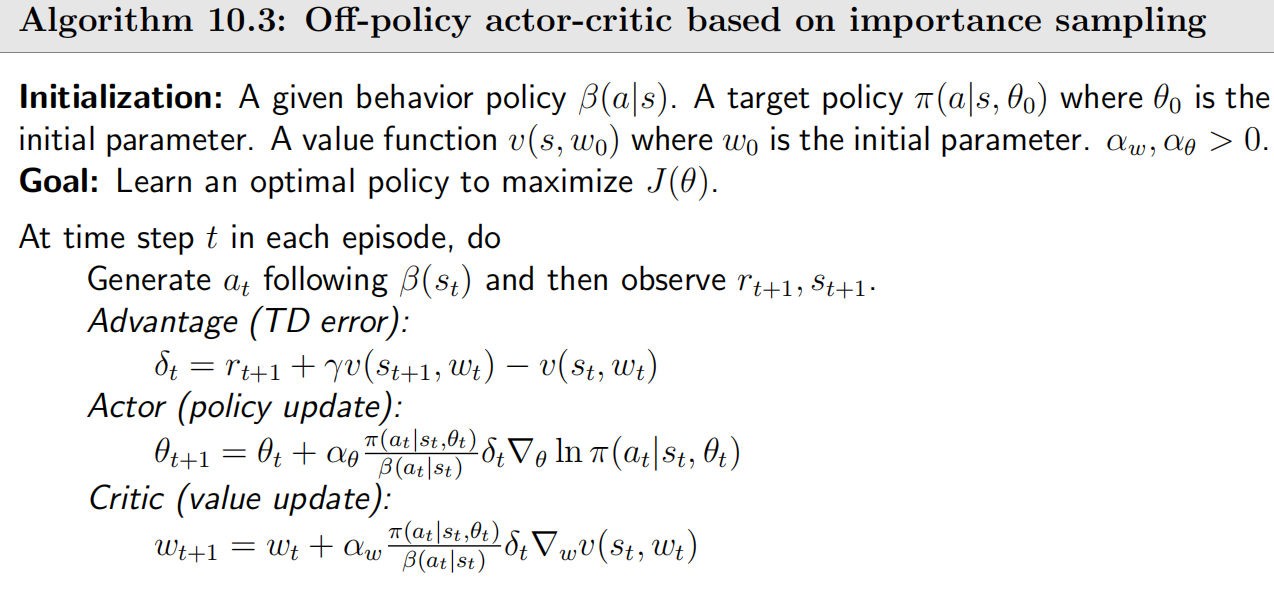
由于得到的$\pi_{\theta}(s,a) > 0$,因此以上方法均是`stochastic policy`,即我们最终得到的是采取某个行动的概率值，选择我们直接得到从S到A的映射，这是一种`deterministic policy`，表示为： 
$$
a = \mu(s, \theta) \doteq \mu(s)
$$
同上的推导过程，我们得到导数为：
$$
\begin{aligned}
\nabla_{\theta} J(\theta) &=\left.\sum_{s\in\mathcal{S}}\eta(s)\nabla_{\theta}\mu(s)\left(\nabla_{a} q_{\mu}(s, a)\right)\right|_{a=\mu(s)}\\
& =\mathbb{E}_{S\sim\eta}\left[\left.\nabla_{\theta}\mu(S)\left(\nabla_{a} q_{\mu}(S, a)\right)\right|_{a=\mu(S)}\right],
\end{aligned}
$$
这里并没有涉及到A的分布，因此天然是一种Off-Policy的方法。以下为`DPG`算法
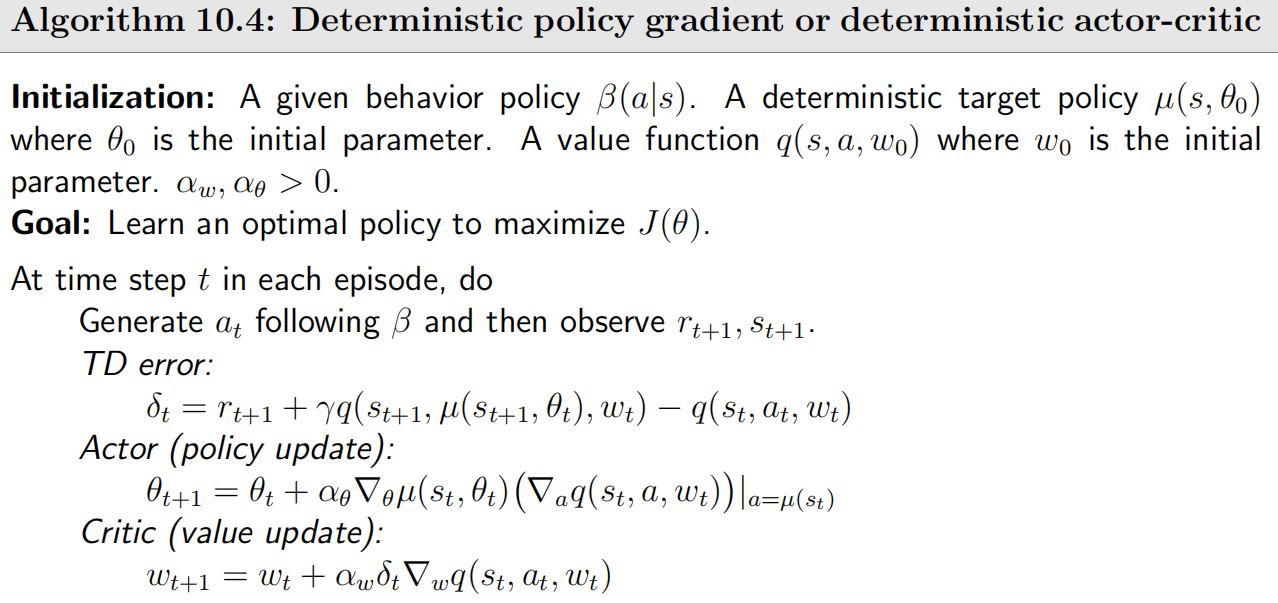    
如果用神经网络近似q(s,a,w)，则为`DDPG`
